<a href="https://colab.research.google.com/github/ma-sujithkumar/CNN-for-NLP-Twitter-Toxic-Comments/blob/master/CNN_for_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Convolutional Neural Network for Natural Language Processing**

In this project, Let us build a CNN which could classify the toxic speech from hate speech dataset (Twitter Tweets) taken from t-davidson's github repository.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, MaxPooling1D
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

**Reading the dataset**

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv")

In [4]:
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
x=data["offensive_language"].values
y=data["tweet"].values

(array([ 3475.,  2066.,  4246., 13383.,   251.,   369.,   857.,    33.,
           37.,    66.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

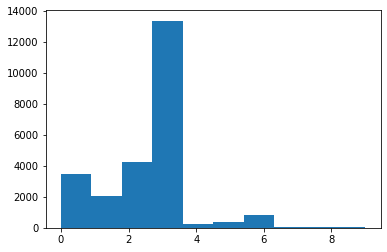

In [6]:
plt.hist(x)

In [7]:
data.nunique()

Unnamed: 0            24783
count                     5
hate_speech               8
offensive_language       10
neither                  10
class                     3
tweet                 24783
dtype: int64

In [8]:
data.shape

(24783, 7)

## **Converting to a Binary Classification**

Here, we have different levels in offensive_language, varying from 1 to 10. Let's create a seperate column named **Toxic_Comment**


Toxic is 1  if offensive_language>0

Toxic is 0 if offensive_language==0(No offense)

In [9]:
data['Toxic_Comment'] = [0 if x==0 else 1 for x in data["offensive_language"].values]
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,Toxic_Comment
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [10]:
y=data["Toxic_Comment"].values
x=data["tweet"].values

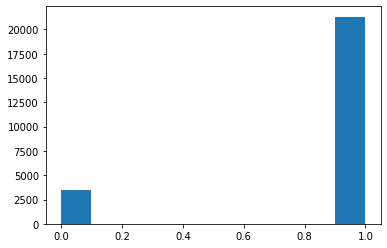

In [11]:
plt.hist(y)
plt.show()

In [13]:
data["Toxic_Comment"].value_counts()

1    21308
0     3475
Name: Toxic_Comment, dtype: int64

By seeing this, we can understand that 3475 rows have no offensive languages and hence they are non-toxic

## **Sequences and Padding the Texts**

In [14]:
max_features = 20000
max_text_length = 200

In [23]:
tokenizer = text.Tokenizer(max_features)
tokenizer.fit_on_texts(list(x))
tokenized = tokenizer.texts_to_sequences(x) 
train_data = sequence.pad_sequences(tokenized, maxlen=max_text_length)

In [24]:
train_data

array([[   0,    0,    0, ...,    5,   56,   61],
       [   0,    0,    0, ...,    5,  946,  579],
       [   0,    0,    0, ..., 1127,   81,   49],
       ...,
       [   0,    0,    0, ...,  383,   36,  307],
       [   0,    0,    0, ..., 2122,    6, 1495],
       [   0,    0,    0, ...,   17,   12,   15]], dtype=int32)

## **Transfer Learning**

Here, we will be using the Glove dataset from stanford which contains the pre-processed data and create our embedding layers

In [25]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2020-09-15 06:29:43--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-09-15 06:29:44--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-09-15 06:29:44--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

## **Creating the Word Embedding Layer**




In [26]:
dimensions=100
embedding_index={}
embedding_matrix=np.zeros((max_features, dimensions))
file=open("/content/glove.6B.100d.txt")
for i in file:
  value=i.split()
  word=value[0]
  numbers=np.asarray(value[1:],dtype="float32")
  embedding_index[word]=numbers
file.close()
for word,index in tokenizer.word_index.items():
  if index>max_features-1:
    break
  else:
    embedding_vector=embedding_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[index]=embedding_vector

In [27]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.27085999,  0.044006  , -0.02026   , ..., -0.4923    ,
         0.63687003,  0.23642001],
       [ 0.33096999,  0.082649  ,  0.66940999, ...,  0.14552   ,
         0.096472  , -0.28279001],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.15765999, -0.14172   , -0.31169999, ..., -0.21002001,
        -1.21039999, -0.17801   ],
       [-0.054339  , -0.34303001, -0.038491  , ...,  0.20587   ,
         0.021301  , -0.17301001]])

In [28]:
model = Sequential()
model.add(Embedding(max_features,
                    dimensions,
                    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                    trainable=False))
model.add(Dropout(0.2))

**## Defining a 1D Convolutional Neural Network**

In [29]:
model.add(Conv1D(250,3,padding='valid',activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(250,
                 5,
                 padding='valid',
                 activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) ##binary classification
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         2000000   
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 250)         75250     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 250)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 250)         312750    
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               6

In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
x_train, x_test, y_train, y_test = train_test_split(train_data, y, test_size=0.2, random_state=0) ##Train and Test Split

## Training the model

In [32]:
model.fit(x_train, y_train,
          batch_size=32,epochs=6)

Epoch 1/6
620/620 [==============================] - 121s 195ms/step - loss: 0.2392 - accuracy: 0.8968
Epoch 2/6
620/620 [==============================] - 122s 197ms/step - loss: 0.1903 - accuracy: 0.9158
Epoch 3/6
620/620 [==============================] - 122s 197ms/step - loss: 0.1718 - accuracy: 0.9252
Epoch 4/6
620/620 [==============================] - 122s 197ms/step - loss: 0.1526 - accuracy: 0.9359
Epoch 5/6
620/620 [==============================] - 125s 201ms/step - loss: 0.1320 - accuracy: 0.9466
Epoch 6/6
620/620 [==============================] - 123s 198ms/step - loss: 0.1138 - accuracy: 0.9536


In [33]:
model.evaluate(x_test, y_test, batch_size=128)

39/39 [==============================] - 8s 200ms/step - loss: 0.2392 - accuracy: 0.9124


[0.23921510577201843, 0.9124470353126526]

# ***Accuracy: 91.12%***

In [34]:
y_testing = model.predict(x_test,verbose = 1, batch_size=32)

155/155 [==============================] - 9s 56ms/step


In [35]:
len(y_test)

4957

In [78]:
y_testing.shape

(4957, 1)

In [ ]:
y_testing[0]

array([0.98743916], dtype=float32)

In [37]:
y_test[0]

1

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


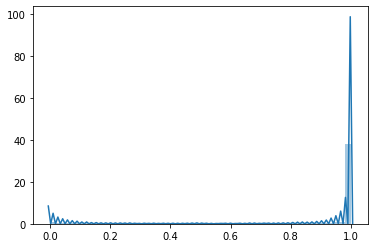

In [38]:
import seaborn as sns
sns.distplot(y_testing)

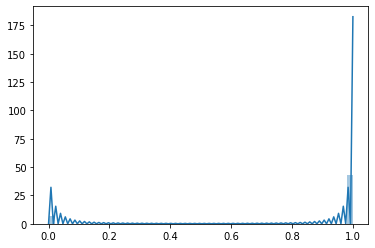

In [39]:
sns.distplot(y_test)

From these plots, we can understand that our model performs well on unseen data!

In [79]:

model.save('saved_model/my_model') 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/my_model/assets
